# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: 
2. Accuracy Score: 
3. Cross Validation Score: 
4. Final Accuracy Score(After Hyperparamter Tunning): 
5. f1 score,classification report,roc score and confusion matrix:
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
     - 2.1:Import all necessary libraries
     - 2.2:Load Dataset
     - 2.3:Descriptive Analysis
     - 2.4:Observations
- Step 3: Exploratory Data Analysis
     - 3.1:Encoding
     - 3.2:Normal Distribution Check(Univariate Analysis)
     - 3.3:Scatter Plot Check(Bivariate Analysis)
     - 3.4:Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis
     - 3.5:Outlier Check
     - 3.6:Skewness Check
     - 3.7:Categorical Variable(s) Check
- Step 4: DATA PREPROCESSING
     - 4.1:Removal of Duplicates
     - 4.2:Dropping of Features that strongly promotes multicollinearity(VIF)
     - 4.3:Removal of Outliers
     - 4.4:Transforming Data to Remove Skewness using Power transformation
     - 4.5:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
     - 5.1:Linear Regression
     - 5.2:RandomForest Regressor
     - 5.3:AdaBoost Regressor
     - 5.4:GradientBoosting Regressor
     - 5.5:XGBoost Regressor
     - 5.6:ExtraTrees Regressor
     - 5.7:Support Vector Regressor(SVR)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
     - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
     - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:MODEL SAVING

# PROBLEM STATEMENT(Loan Prediction Problem)

The data scientists at financial institution has collected data of prospective customers on if they qualify to access a loan or not.We have alot of features we are going to consider in determining the output,label or target variable which is the loan status approval. The aim is to build a predictive model and find out if a particular prospective customer qualifies to access a loan or not.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset is one csv file: 

Note: You can find the dataset in the link below.

Downlaod Files:train_u6lujuX_CVtuZ9i.csv

# Domain Knowledge
This is critical stage in any machine learning process. It involves brainstorming and coming up with as many hypothesis as possible about what could affect the target variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement.

- The customers credit history of the customer plays a major role in the approval of the loan
- The customer must have a verifiable source of income or some form of employment.
- The customer must have been working for his current establishment for at least 6months.
- The loan accessible is subject to his or her monthly income or cash flow.

# Step 1 - ATTRIBUTES OF VARIABLES

1. Gender - This is the sex of the customer either male or female 

2. Married - This is the marital status of the prospective customer.Either married or unmarried.

3. Dependents - This is the number of dependants

4. Education - The is the level or status of the education of the prospect.

5. Self_Employed - This is the employment status of the prospect.

6. ApplicantIncome - This is the income of the prospect.

7. CoapplicantIncome - This is the income of the prospects partner.

8. LoanAmount -  This is the loan amount of the prospect or applicant.

9. Loan_Amount_Term - This is the tenure of the loan facility.

10. Credit_History - This is the credit history of the prospect.

11. Loan_Status - This is the loan status whether the loan is approved or not.

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve,mean_squared_error,mean_absolute_error
from scipy.stats import zscore
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [3]:
#Load dataset
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking the last five rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#picking 4 random samples
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
172,LP001586,Male,Yes,3+,Not Graduate,No,3522,0.0,81.0,180.0,1.0,Rural,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
71,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y


# Step 2.3 - Data Descriptive Analysis

In [6]:
#checking the data shape
df.shape

(614, 13)

In [7]:
#checking for nature of datatypes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#Checking data description for all numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
#lets check the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
#Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#Checking for null values
df.isnull().sum().sum()

149

In [14]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
#Checking the content of each Categorical columns
print("The Value Counts in gender - ",Counter(df['Gender']))
print("The Value Counts in married - ",Counter(df['Married']))
print("The Value Counts in dependants - ",Counter(df['Dependents']))
print("The Value Counts in education - ",Counter(df['Education']))
print("The Value Counts in self employed - ",Counter(df['Self_Employed']))
print("The Value Counts in property area - ",Counter(df['Property_Area']))
print("The Value Counts in loan status - ",Counter(df['Loan_Status']))

The Value Counts in gender -  Counter({'Male': 489, 'Female': 112, nan: 13})
The Value Counts in married -  Counter({'Yes': 398, 'No': 213, nan: 3})
The Value Counts in dependants -  Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})
The Value Counts in education -  Counter({'Graduate': 480, 'Not Graduate': 134})
The Value Counts in self employed -  Counter({'No': 500, 'Yes': 82, nan: 32})
The Value Counts in property area -  Counter({'Semiurban': 233, 'Urban': 202, 'Rural': 179})
The Value Counts in loan status -  Counter({'Y': 422, 'N': 192})


In [16]:
#Checking the content of each Categorical columns
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Step 2.4 - Observations


# The Train Dataset is made up of;
- 614 rows and 12 columns
- 11 features and 1 Target

# Description of Features:
1. Gender: 
- It is made up of Categorical data
- It has 2 classes 489 males and 112 females
- It has no 13 values
- Its Datatype is an Object type

2. Married:
- It is made up of Categorical data
- It has null values to the tune of 3
- Its Datatype is an object
- it has 398 married and 213 unmarried

3. Dependants: 
- It is made up of Categorical data
- It has 15 null values
- Its Datatype is an Object type

4. Education:
- It is made up of Categorical data
- It has no null values
- Its Datatype is an object type
- its has 480 graduates and 134 non graduates

5. self employed : 
- It is made up of Categorical data
- It has 2 factors; 500 employed and 82 self employed
- It has 32 null values
- Its Datatype is an Object type

6. property area:
- It is made up of Categorical data
- It has no null values
- Its Datatype is an object type
- it has three factors,233 semiburban,202 urban and 179 rural

7. loan status: 
- It is made up of Categorical data
- It has 2 factors; 422 approved and 192 un approved
- It has no null values
- Its Datatype is an Object type

8. ApplicantIncome:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an float type

9. CoapplicantIncome    : 
- It is made up of Continousl data
- It has no null values
- Its Datatype is an float type

10. LoanAmount: 
- It is made up of Continous data
- It has 22 null values
- Its Datatype is an float type

11. Loan_Amount_Term: 
- It is made up of Continous data
- It has 14 null values
- Its Datatype is an float type

11. Credit_History: 
- It is made up of Continous data
- It has 50 null values
- Its Datatype is an float type



# About the Target/Label:
- loan status: 
- It is made up of Categorical data
- It has 2 factors; 422 approved and 192 un approved
- It has no null values
- Its Datatype is an Object type


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 Count Distribution of Categorical Data - Univariate Analysis

In [24]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Male      489
Female    112
Name: Gender, dtype: int64


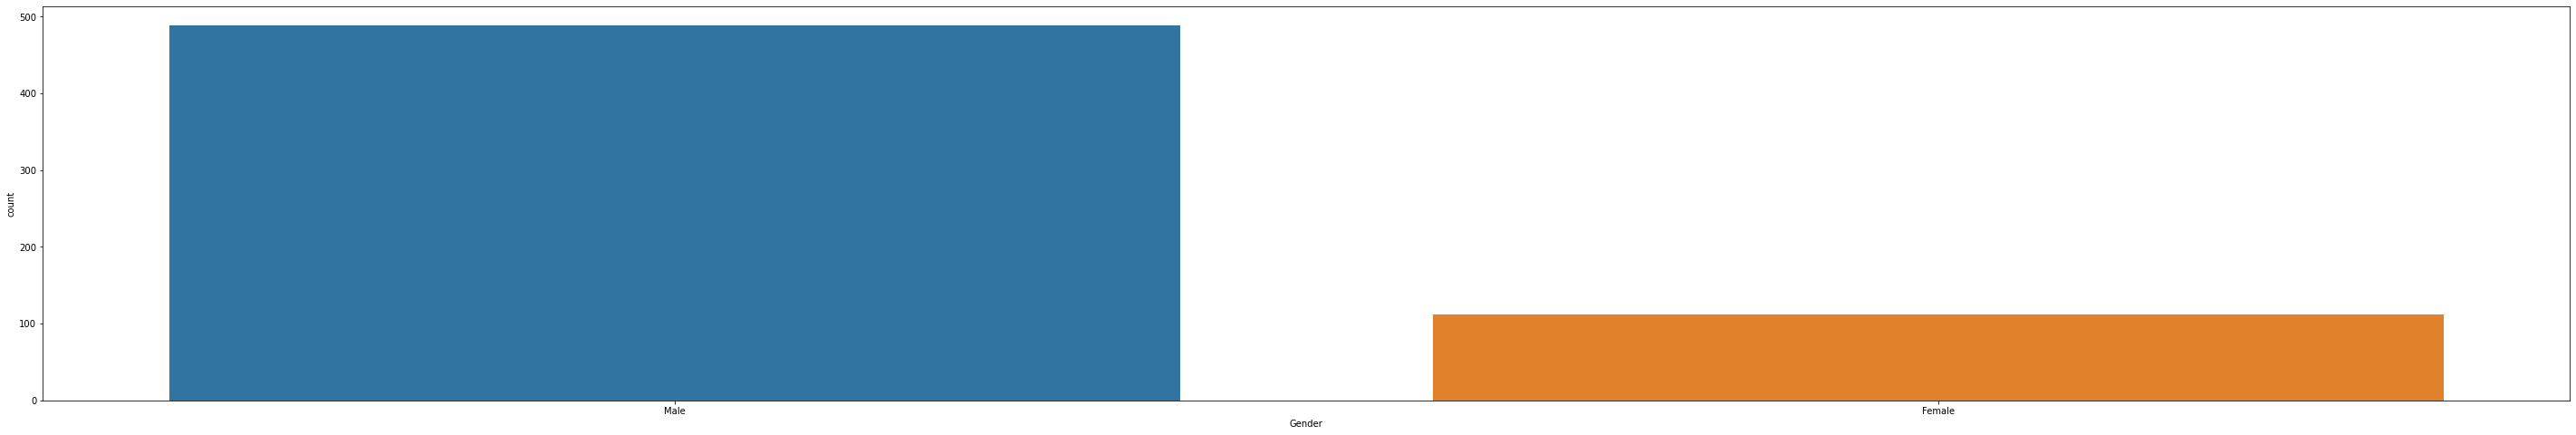

In [25]:
#Item_Identifier
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64


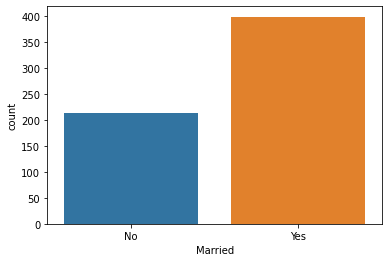

In [26]:
#MARRIED
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


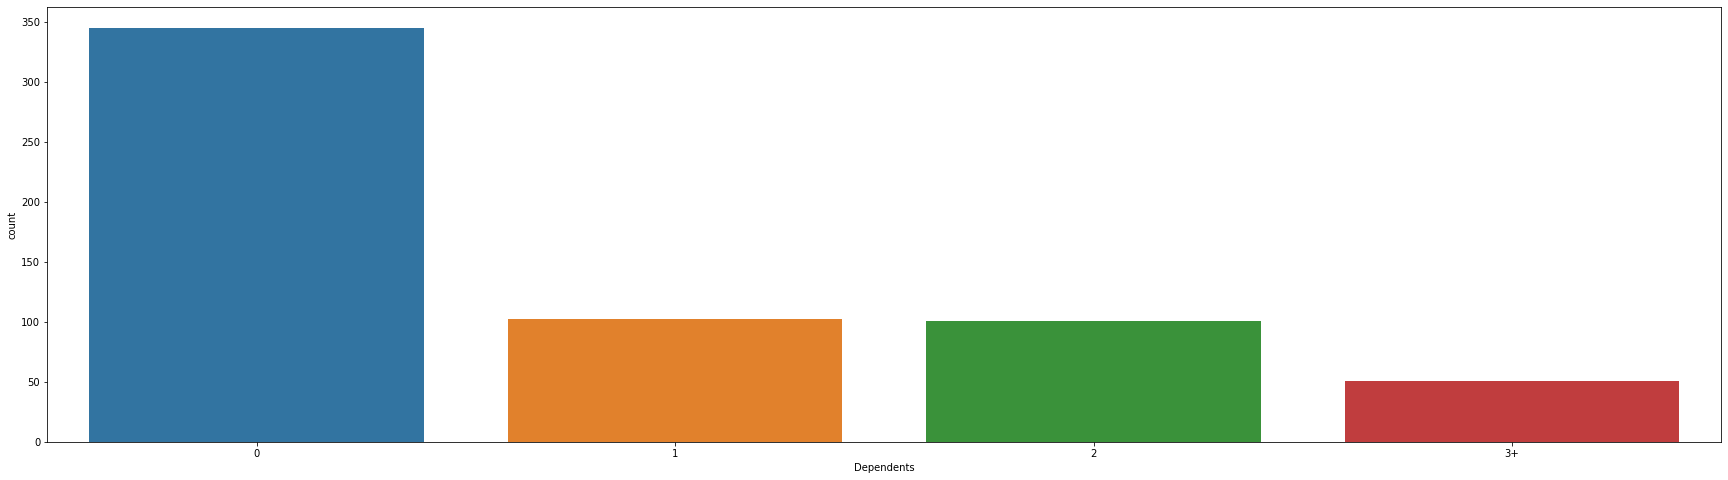

In [27]:
#DEPENDENTS
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


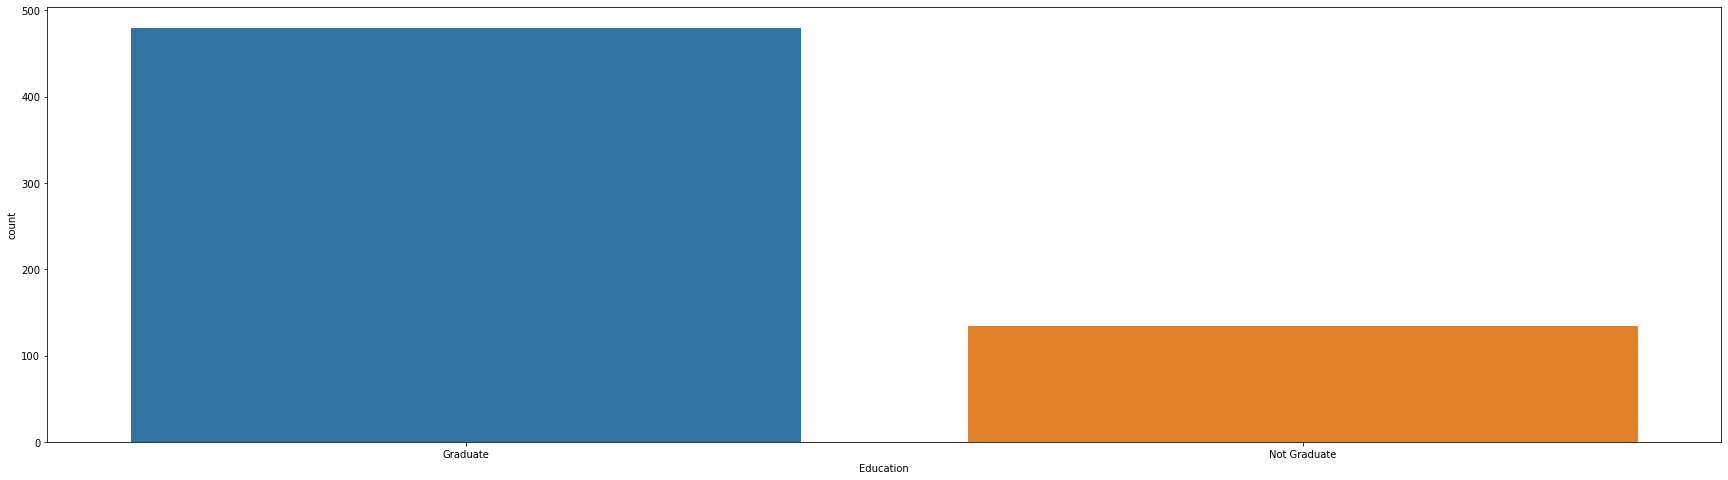

In [28]:
#EDUCATION
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


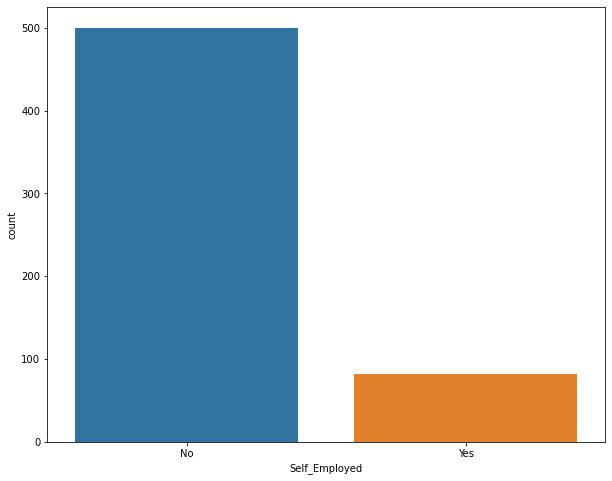

In [29]:
#SELF EMPLOYED
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


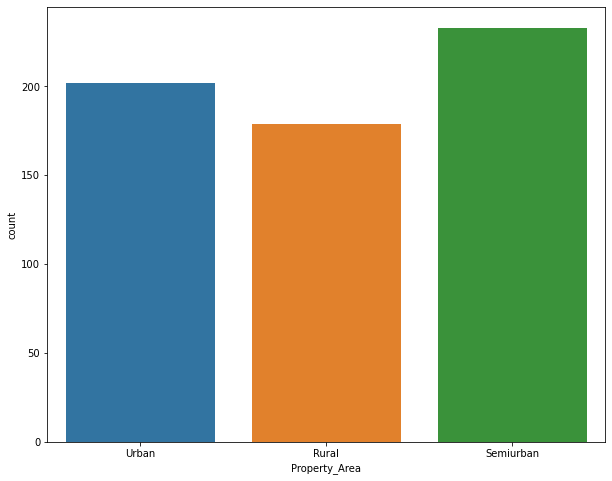

In [30]:
#PROPERTY AREA
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


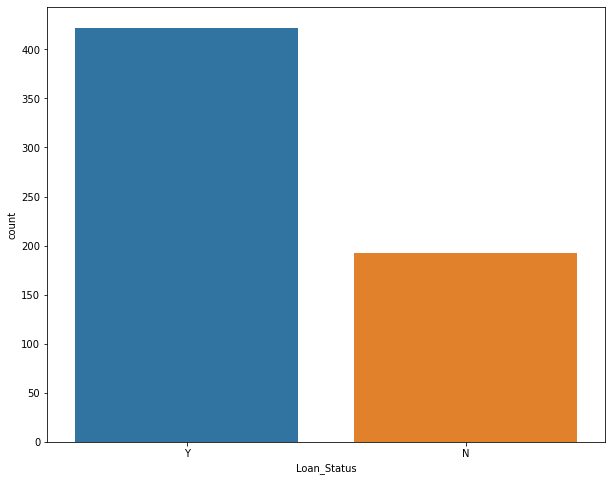

In [31]:
#LOAN STATUS,THIS IS THE TARGET VARIABLE
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

# Observations Univariate Analysis on Categorical Data 
From the above count plots 
- The LOAN STATUS is unbalanced data.
- Majority of the customers live in the semi urban area.
- Majority of the customers are employed
- Majority of the customers are graduates
- Majority of the customers dont have dependents
- Majority of the customers are males

# Step 3.2 Updating Null values

In [32]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We shall update:
- All continous data with the mean
- All Categorical data with the mode

Lets go!

In [33]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])


df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [34]:
#rechecing for null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 # Observations on Null Update 
From the above we can see that all null values have been updated! 

In [35]:
# Lets drop the loan id because its not contributing anything to the features and the target variable
df = df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Step 3.3 Encoding
- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [36]:
#initializing....
enc=OrdinalEncoder()

In [37]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [38]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [39]:
#Tranforming into numerical data
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [40]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [42]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0
613,0.0,0.0,0.0,0.0,1.0,4583,0.0,133.0,360.0,0.0,1.0,0.0


In [43]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,1.0,1.0,0.0,0.0,0.0,13650,0.0,146.412162,360.0,1.0,2.0,1.0
325,1.0,1.0,1.0,0.0,1.0,8666,4983.0,376.000000,360.0,0.0,0.0,0.0
265,1.0,0.0,0.0,0.0,0.0,4095,3447.0,151.000000,360.0,1.0,0.0,1.0
257,1.0,1.0,3.0,0.0,0.0,5250,0.0,94.000000,360.0,1.0,2.0,0.0
431,1.0,0.0,0.0,0.0,0.0,6500,0.0,105.000000,360.0,0.0,0.0,0.0
366,1.0,0.0,0.0,0.0,0.0,2500,0.0,96.000000,480.0,1.0,1.0,0.0
175,1.0,1.0,0.0,0.0,0.0,3497,1964.0,116.000000,360.0,1.0,0.0,1.0
340,1.0,1.0,3.0,1.0,0.0,2647,1587.0,173.000000,360.0,1.0,0.0,0.0
517,1.0,1.0,0.0,1.0,0.0,3074,1800.0,123.000000,360.0,0.0,1.0,0.0
183,1.0,1.0,1.0,0.0,0.0,33846,0.0,260.000000,360.0,1.0,1.0,0.0


In [44]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [45]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

# Observations on Encoding
Frome the above its crystal clear that all Non-numrical data have been converted(encoded) to Numerical Data!

# Step 3.4 - Normal Distribution Check(Univariate Analysis)

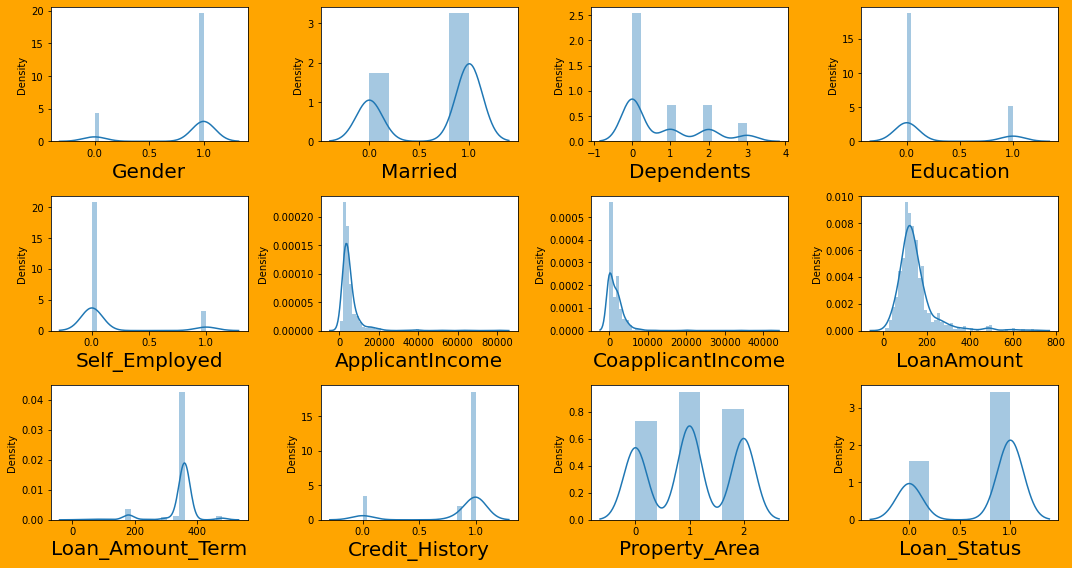

In [46]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='orange')#dimension and color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)#2,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot:

- We can see that All the features does not obey a normal distribution, the building blocks is not in tandem with a normalized     curve

- The normal distribution of these features; 'Gender', 'Married','Dependents', 'Education','Property_Area' has no contribution to our Model Building since they are categorical data

- The normal distribution of the Loan Status columns also has no contribution to our Model Building since its the Target     variable

In [47]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop(columns=['Loan_Status'],axis=1)
features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


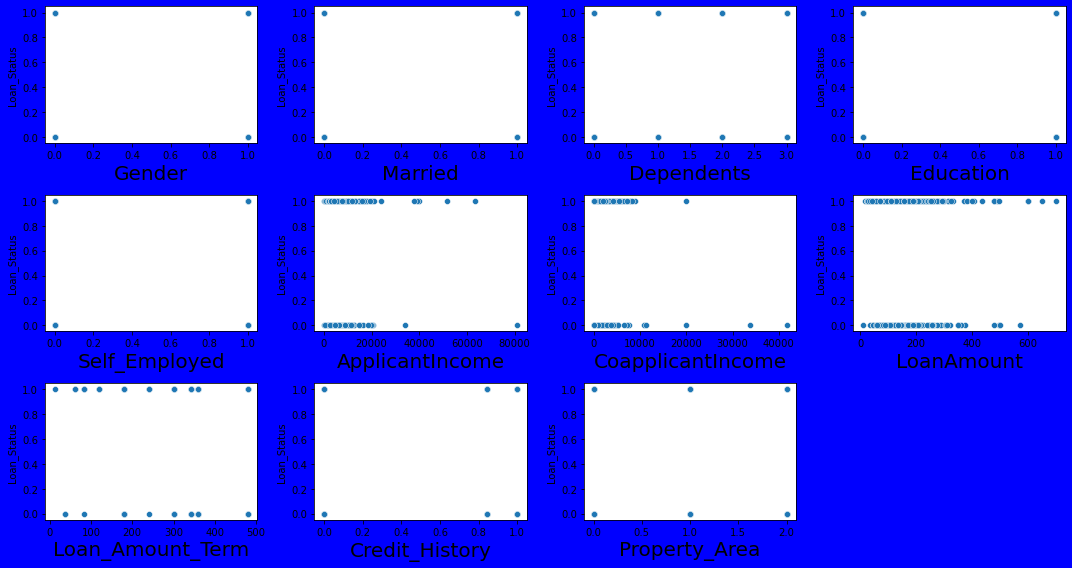

In [49]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=12:#since there are 3 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['Loan_Status'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot

From the above scatter plot we can see a strong relationship between some of the features and the Label(Loan statsu).

# Step 3.5 - Count Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the Categorical features and the Label

# Step 3.6 - Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [50]:
#checking for general correlation
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


In [51]:
#checking for correlation between each feature and Label
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

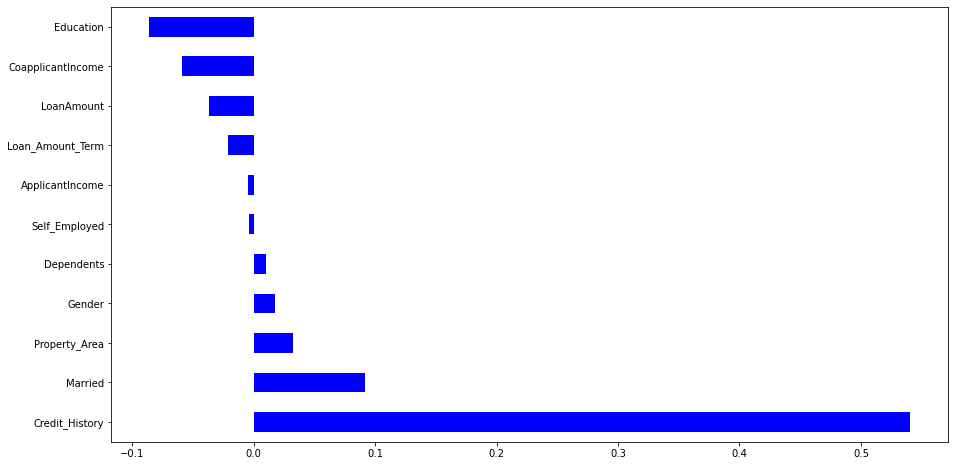

In [52]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

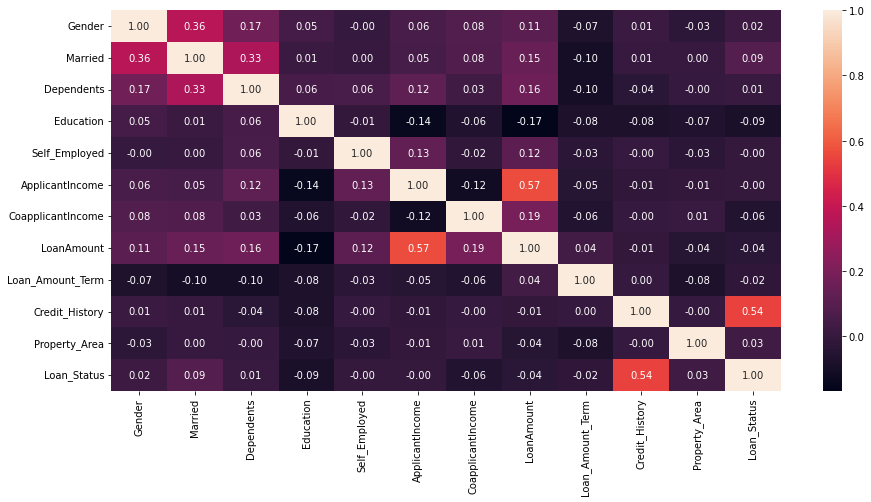

In [53]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

Hmmmm....we can see that most features DO NOT share a 'direct relationship' between each other! as the majority of the map-squares are not bright! But lets conlcude with our findings first:

<function matplotlib.pyplot.show(close=None, block=None)>

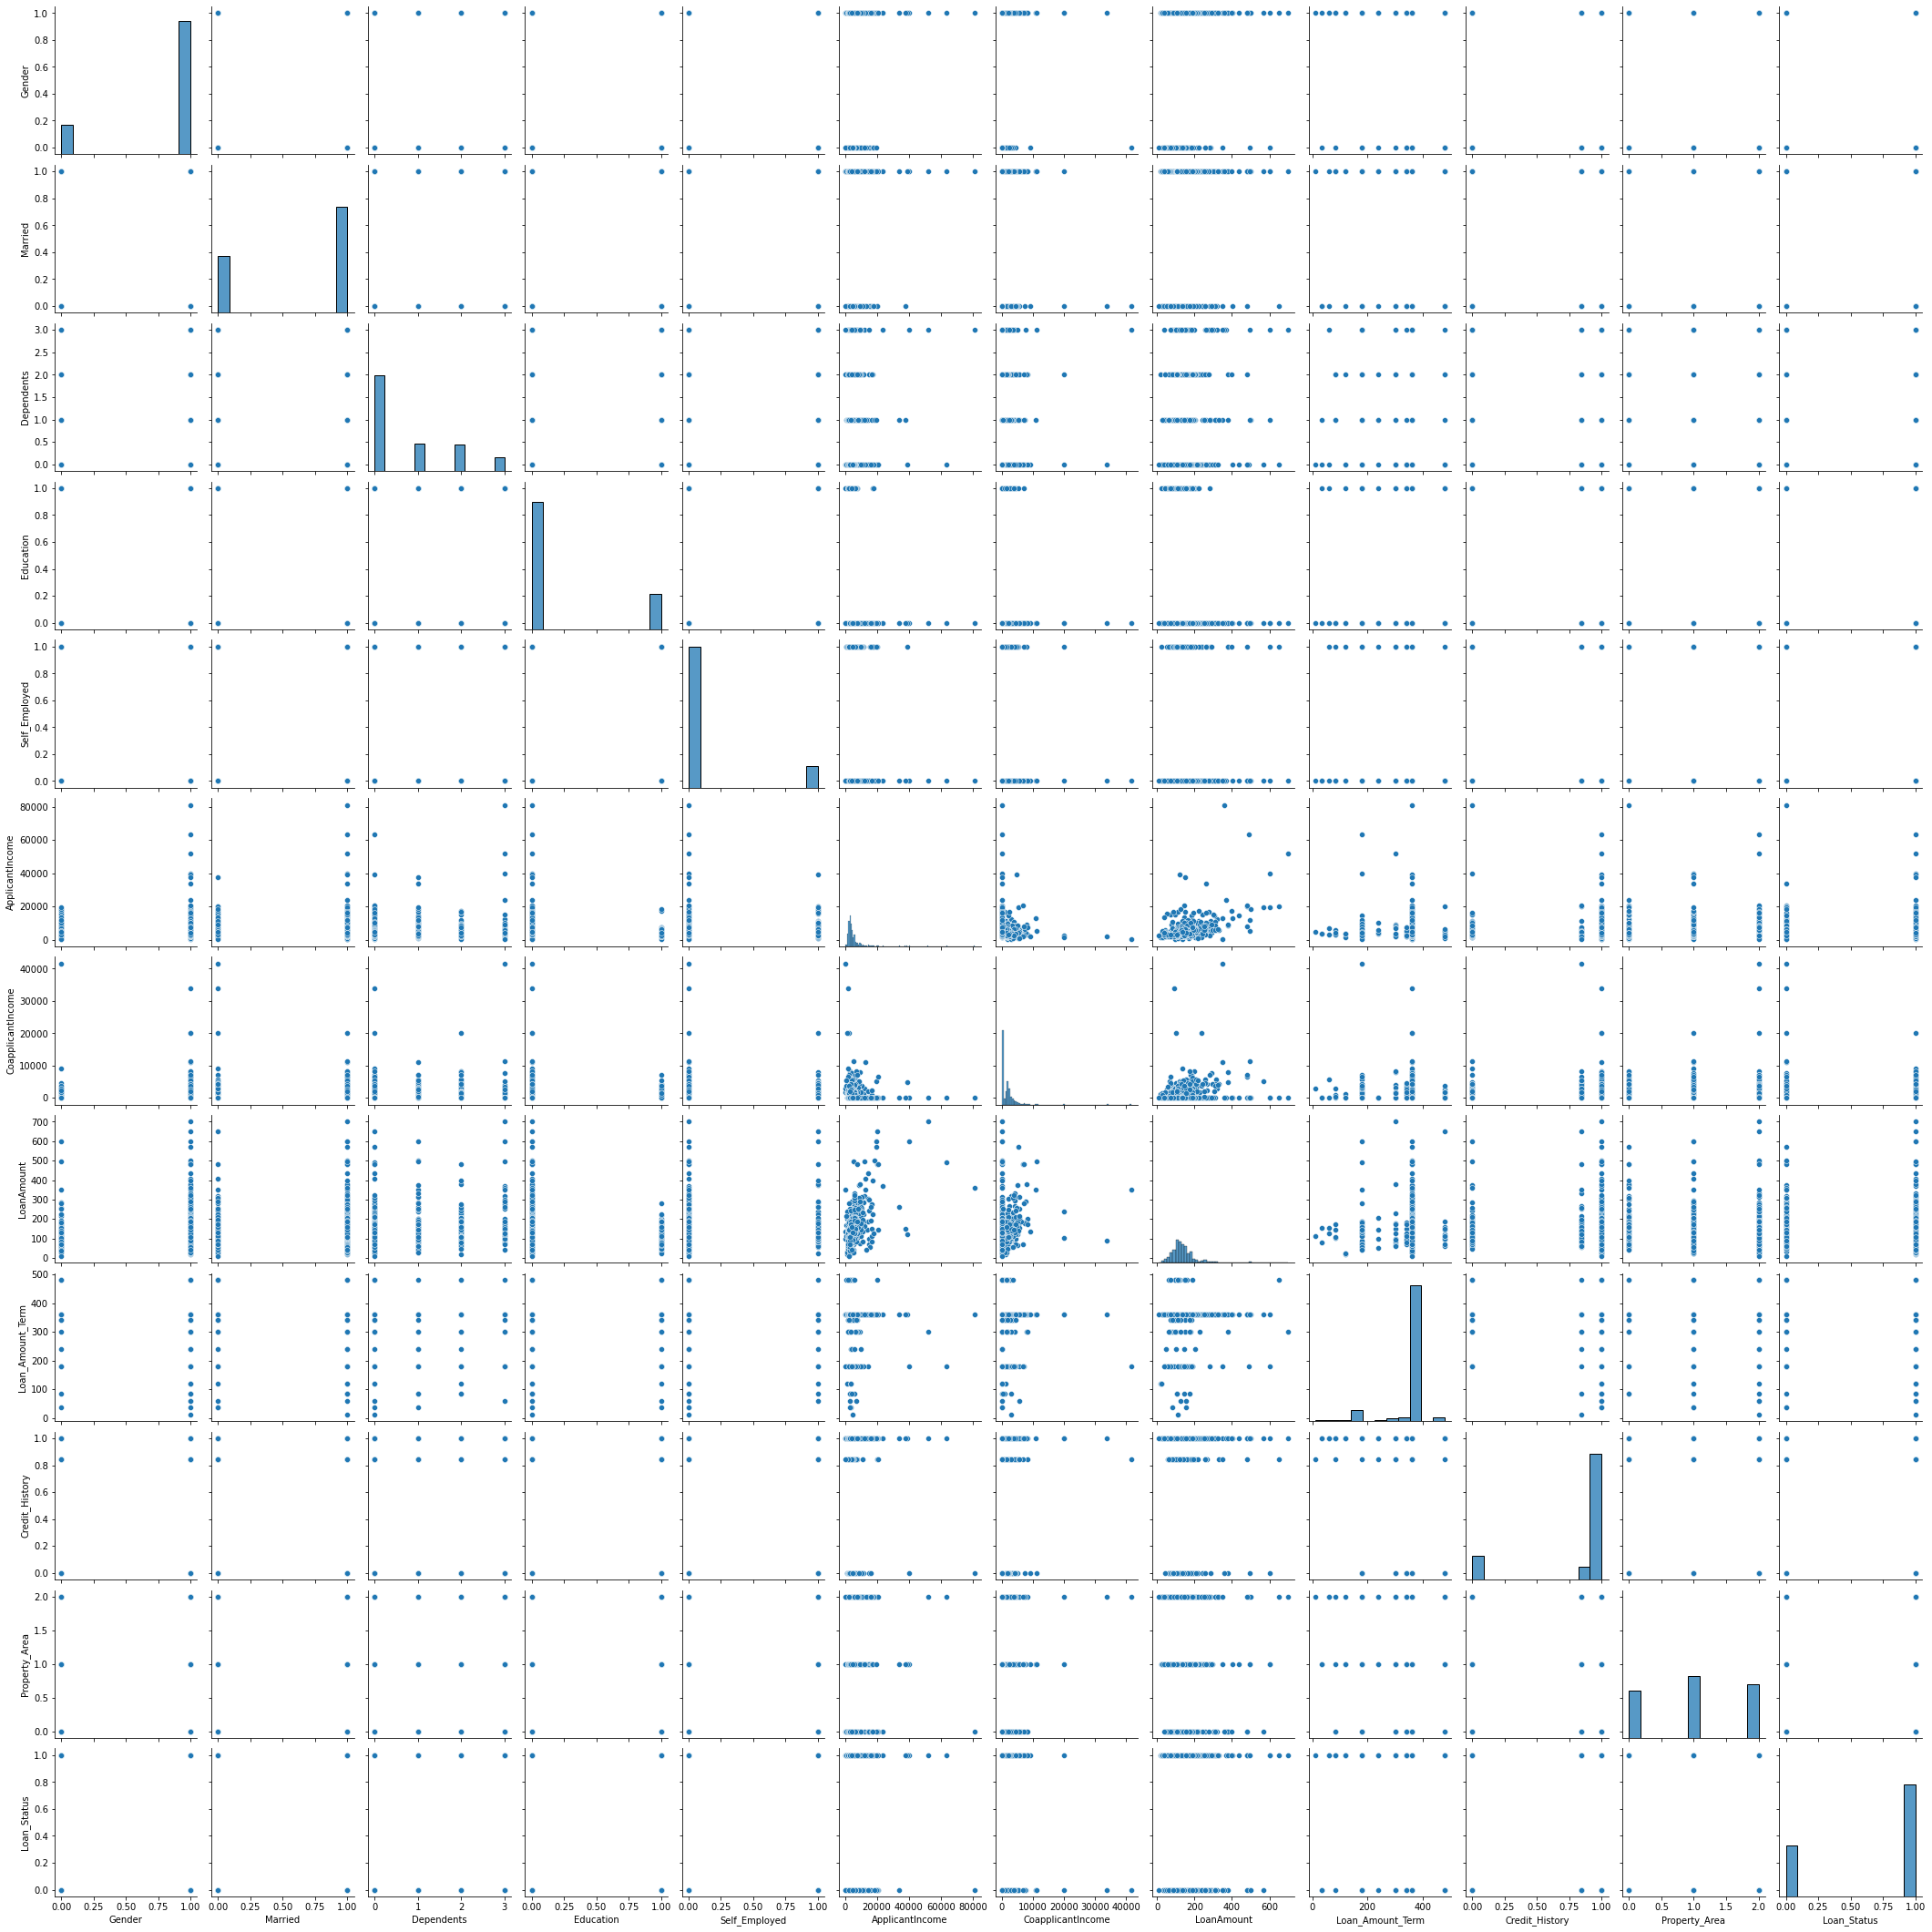

In [54]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

In [55]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

# Observations on Correlation(Collinearity & Multicollinearity)
From the above correlation statistics;

Collinearity:
 - Education has a negative correlation of 0.8% with the target column which can be considered as a poor bond
 - CoapplicantIncome  has a negative correlation of 0.5% with the target column which can be considered as a poor bond
 - LoanAmount has a negative correlation of 0.3% with the target column which can be considered as a poor bond
 - Loan_Amount_Term has a negative correlation of 0.2% with the target column which can be considered as a poor bond
 - ApplicantIncome has a negative correlation of 0.04% with the target column which can be considered as a poor bond
 - Self_Employed  has a negative correlation of 0.03% with the target column which can be considered as a poor bond
 - Dependents has a positive correlation of 0.1% with the target column which can be considered as a  poor bond
 - Gender has a positive correlation of 0.3% with the target column which can be considered as a poor bond
 - Property_Area has a positive correlation of 0.3% with the target column which can be considered as a poor bond
 - Married  has a positive correlation of 1% with the target column which can be considered as a poor bond
 - Credit_History  has a positive correlation of 54% with the target column which can be considered as a good bond

 
 - Feature with Maximum correlation = '54%'
 - Feature with Minimum correlation = '0.03%'
 
Multicollinearity:
 - From the heatmap we can see that the ALMOST ALL pairs of features DOES NOT have noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

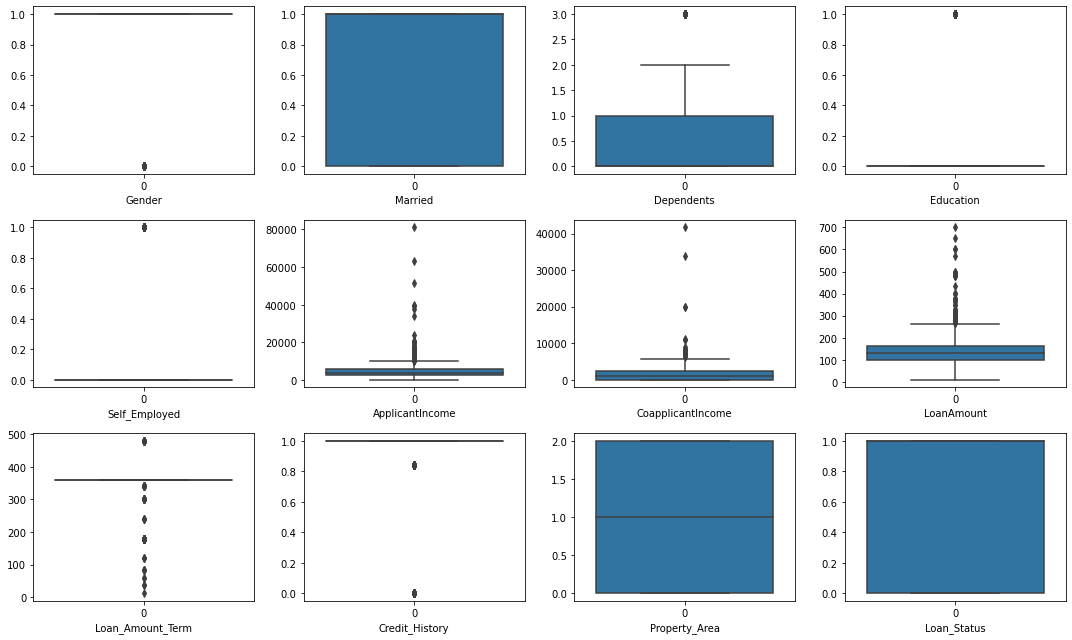

In [56]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=12:#this was made 8 just to allow for 4 spaces
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
 - From the above visualization plot its evident applicant income,coapplicant income,loan amoun feature posses outliers, however this is subject to      further analysis and reconfirmation using the zscore!
 
 -  The outlier of the categorical data does not impact our model
 
 - The outlier of the Target data does not impact our model

# Step 3.5 - Skewness Check

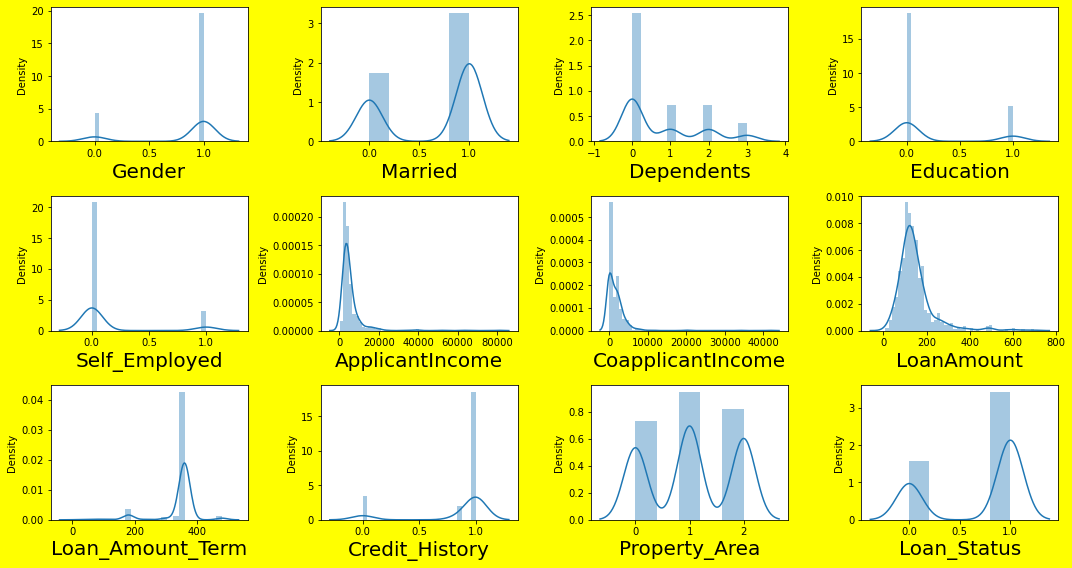

In [57]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [58]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence the below features are skewed:

- Loan amount
- applicant income
- coapplicant income

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates and Unwanted Column

In [59]:
#Recheking shape of original data
df.shape

(614, 12)

In [60]:
#Remove duplicates
# we dont have duplicates
df.drop_duplicates(inplace=True)
df.shape

(614, 12)

It appears there are no duplicates since there is no change in the number of rows!

# Step 4.2 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

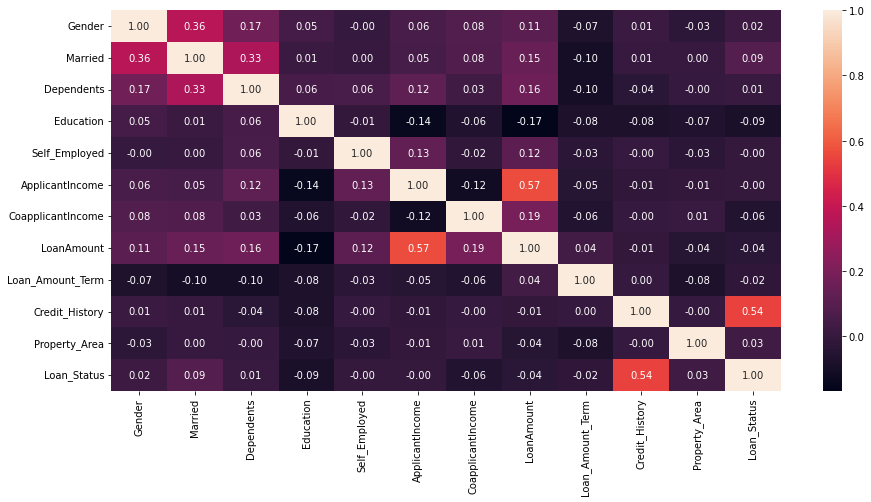

In [61]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap above we can see that there is no visible correlation between one another

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [62]:
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']

In [63]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.27985054,
         0.45164045,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.45164045, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.45164045,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.45164045,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.27985054,
         0.45164045,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.27985054,
        -2.41044061, -0.04760721]])

In [64]:
#checking the shape
X_Scaled.shape

(614, 11)

Now we shall treat the above shape as an array of numbers(tuple) where 614 and 11 are the zeroth and first index respectively.

In [65]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [66]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(3) or (0,1,2), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 3. Now all the columns in X_Scaled which is (0,1,2) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [67]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘sales’ )
vif

,vif,Features
0,1.170065,Gender
1,1.281481,Married
2,1.164040,Dependents
3,1.064347,Education
4,1.023725,Self_Employed
5,1.630887,ApplicantIncome
6,1.140816,CoapplicantIncome
7,1.710373,LoanAmount
8,1.049586,Loan_Amount_Term
9,1.008661,Credit_History


From the above vif dataframe,we are setting a vif threshold of 6, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, MULTICOLLINEARITY DOES NOT EXIST!

# Step 4.3 - Removal of Outliers

This will be achieved using the zscore

In [68]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.279851,0.451640,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.279851,0.451640,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.279851,0.451640,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.279851,0.451640,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,2.518655,0.451640,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [69]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(614, 12)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [70]:
#index number
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [71]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (614, 12)
New DataFrame (577, 12)
total_dropped_rows 37


A Total of 37 outliers have been removed! Lets move on! Data is looking great!

In [72]:
#Checking the new dataframe with non-outliers
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


Now we need to reset our data having removed outliers.....

In [73]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
573,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
574,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
575,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [74]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
573,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
574,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
575,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


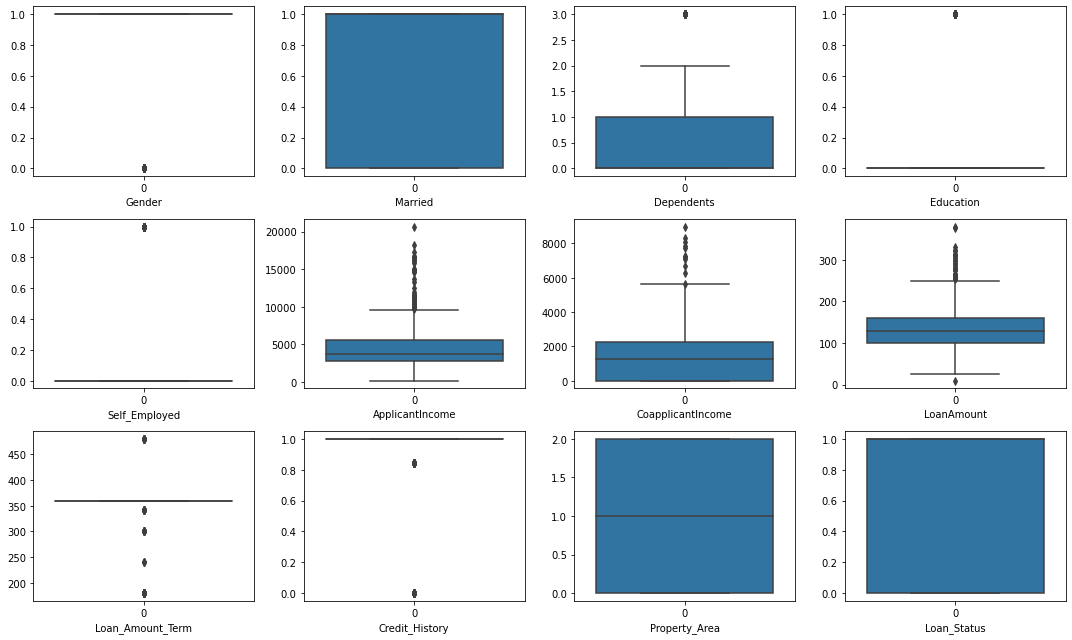

In [75]:
#rechecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=12:
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing box plots
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that all outliers have been removed across the features!

# Step 4.4 - Transforming Data to Remove Skewness using Power transformation

In [76]:
#rechecking for skewness...
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- Since we don't apply skewness removal on target data, we need to create a sub data frame that does not include the loan status  column

- For the skewness data, only the applicant income,coapplicant income and loan amount

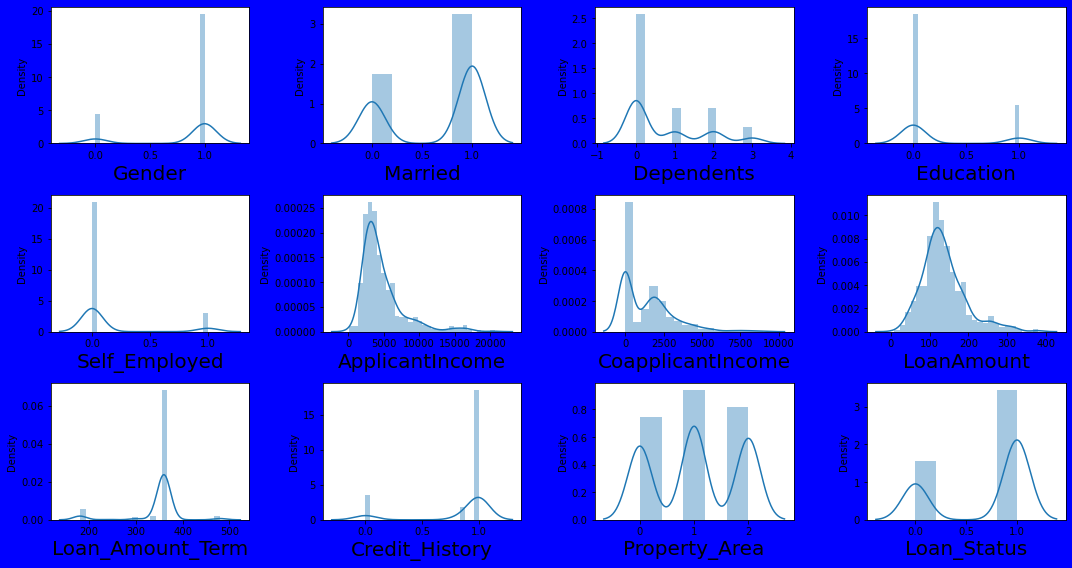

In [77]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with Length
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

A good Pre-Power Transformation procedure is to ensure that there are no zero values in the data stored in 'cont_features' because from domain knowledge, none of the data values in each features(except Sex column) should be zero!

In [78]:
#Firstly, replacing zero values in the continuos columns with the mean (since its made up of continuos data)
df_new['LoanAmount']=df_new['LoanAmount'].replace(0,df_new['LoanAmount'].mean())
df_new['CoapplicantIncome']=df_new['CoapplicantIncome'].replace(0,df_new['CoapplicantIncome'].mean())
df_new['LoanAmount']=df_new['LoanAmount'].replace(0,df_new['LoanAmount'].mean())


Let lets go ahead and apply Power Transformation!

In [79]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [80]:
#extracting the columns that are skewed
data=['LoanAmount','CoapplicantIncome','LoanAmount']

In [81]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

In [82]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,-0.499876,0.316078,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,-0.383223,-0.015871,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,-0.499876,-1.443112,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,0.521888,-0.169860,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,-0.499876,0.221481,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.0,0.0,0.0,0.0,0.0,2900,-0.499876,-1.301481,360.0,1.0,0.0,1.0
573,1.0,1.0,3.0,0.0,0.0,4106,-0.499876,-2.321865,180.0,1.0,0.0,1.0
574,1.0,1.0,1.0,0.0,0.0,8072,-3.594494,1.838099,360.0,1.0,2.0,1.0
575,1.0,1.0,2.0,0.0,0.0,7583,-0.499876,0.961555,360.0,1.0,2.0,1.0


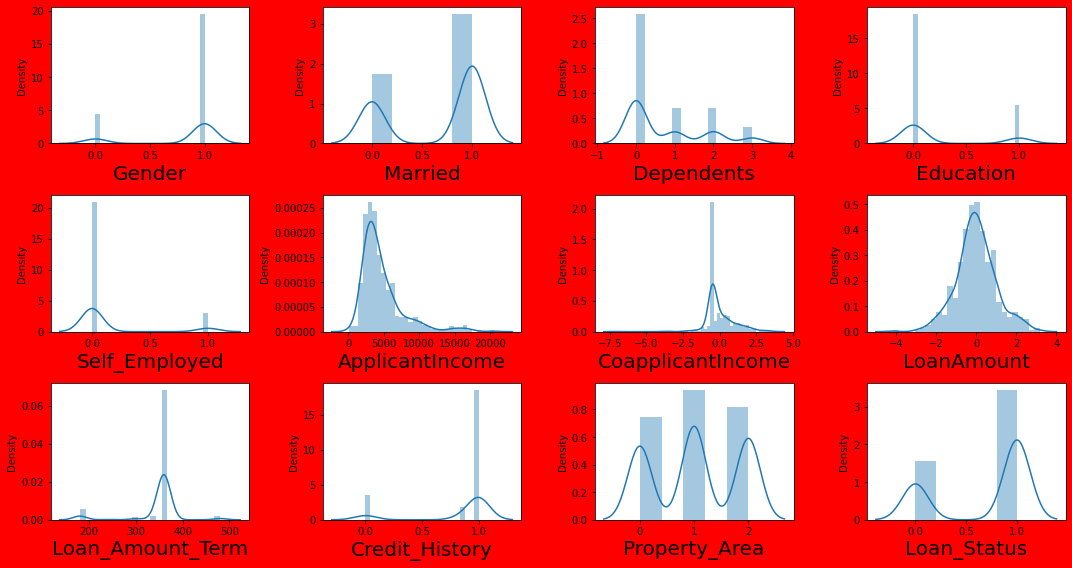

In [83]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [84]:
#rechecking for skewness
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    0.151484
LoanAmount           0.047692
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

From the above you can see all skewness in all continuos data are now removed from the visualisation.

From the above we can see that skewness has been removed!

NOTE:
- All continuos data columns was considered for skewness removal
- The loan status column is not considered for skewness since its the Target data

# Step 4.5 - Seperating the datasets into X and Y variables

In [87]:
#seperation
X=df_new.drop(columns=['Loan_Status','Married','Property_Area'],axis=1)
Y=df_new['Loan_Status']

In [88]:
# we are dropping the gender,marital status and property area because according to the domain knowledge i have these factors have no contribution or relationship
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,-0.499876,0.316078,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,-0.383223,-0.015871,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,-0.499876,-1.443112,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,0.521888,-0.169860,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,-0.499876,0.221481,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.0,0.0,0.0,0.0,0.0,2900,-0.499876,-1.301481,360.0,1.0,0.0,1.0
573,1.0,1.0,3.0,0.0,0.0,4106,-0.499876,-2.321865,180.0,1.0,0.0,1.0
574,1.0,1.0,1.0,0.0,0.0,8072,-3.594494,1.838099,360.0,1.0,2.0,1.0
575,1.0,1.0,2.0,0.0,0.0,7583,-0.499876,0.961555,360.0,1.0,2.0,1.0


In [89]:
df_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Transforming data into standard normal distribution

In [90]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.47713685, -0.72331271, -0.54196123, ...,  0.31607848,
         0.23940793,  0.45646138],
       [ 0.47713685,  0.2823534 , -0.54196123, ..., -0.01587084,
         0.23940793,  0.45646138],
       [ 0.47713685, -0.72331271, -0.54196123, ..., -1.4431122 ,
         0.23940793,  0.45646138],
       ...,
       [ 0.47713685,  0.2823534 , -0.54196123, ...,  1.83809889,
         0.23940793,  0.45646138],
       [ 0.47713685,  1.28801951, -0.54196123, ...,  0.96155535,
         0.23940793,  0.45646138],
       [-2.09583477, -0.72331271, -0.54196123, ...,  0.07720357,
         0.23940793, -2.37248823]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [91]:
#reconfirming that mean is 0
X_Scaled.mean()

-6.396663373153222e-17

In [92]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# Step 5 - MODEL BUILDING

# Step 5.1 - Logistic Regression

# Best Random State

In [93]:
#Using LinearRegression to get the best Random state
lr = LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
    

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  79.31 and 82.43 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  82.76 and 81.56 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  80.17 and 82.21 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  79.31 and 82.43 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  79.31 and 82.43 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  79.31 and 82.43 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  86.21 and 80.69 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  80.17 and 82.43 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  77.59 and 82.86 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  78.45 and 82.65 respectively
At random 

The best accuracy is 89% at random state 91

We have found best_random state value as 91. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [94]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=91,test_size=0.20)

In [95]:
x_train.shape

(461, 9)

In [96]:
x_test.shape

(116, 9)

In [97]:
y_train.shape

(461,)

In [98]:
y_test.shape

(116,)

In [99]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Training Model and Metrics Measurement(classification report,confusion matrix,accuracy score)

In [100]:
lr=LogisticRegression()#Initializing...
lr.fit(x_train,y_train)#Training...
pred_test=lr.predict(x_test)#Prediciting using test data...
pred_train=lr.predict(x_train)#Prediciting using training data...
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_lr= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_lr= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_lr= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_lr= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_lr= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_lr)#printing classification report
print("Test_cm ", Test_cr_lr)#printing confusion matrix

Test_Accuracy  89.66
Test_cr  0.896551724137931
Test_cm                precision    recall  f1-score   support

         0.0       1.00      0.57      0.73        28
         1.0       0.88      1.00      0.94        88

    accuracy                           0.90       116
   macro avg       0.94      0.79      0.83       116
weighted avg       0.91      0.90      0.89       116



LinearRegression is producing average accuracy 86% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [101]:
#Validation accuracy
vac=cross_val_score(lr,X,Y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.81034483 0.79310345 0.79130435 0.86086957 0.8173913 ]
Cross Validation Score is  0.8146026986506746


# Difference between Accuracy Score and Cross Validation Score

In [102]:
Test_Accuracy_lr

0.896551724137931

In [103]:
CV_Score_lr

0.8146026986506746

In [104]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.08194902548725647


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.0819) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.2 - KNN Classifier

# Best Random State

In [105]:
#Using KNeighbors Regressor to get the best Random state
knn=KNeighborsClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
    

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  79.31 and 83.51 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  81.9 and 82.43 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  74.14 and 83.51 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  75.0 and 83.95 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  79.31 and 84.16 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  78.45 and 82.86 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  85.34 and 81.56 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  77.59 and 83.51 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  74.14 and 84.16 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  78.45 and 83.08 respectively
At random st

The best accuracy is 86.21% at random state 71

We have found best_random state value as 88. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=71,test_size=0.20)

# Training Model and Metrics Measurement(classification report,confusion matrix,accuracy score))

In [107]:
knn=KNeighborsClassifier()#Initializing...
knn.fit(x_train,y_train)#Training...
pred_test=knn.predict(x_test)#Prediciting using test data...
pred_train=knn.predict(x_train)#Prediciting using training data...
Test_Accuracy_knn= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_knn= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_knn= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_knn= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_knn= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_knn= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_knn)#printing classification report
print("Test_cm ", Test_cr_knn)#printing confusion matrix

Test_Accuracy  87.07
Test_cr  0.8706896551724138
Test_cm                precision    recall  f1-score   support

         0.0       0.93      0.67      0.78        39
         1.0       0.85      0.97      0.91        77

    accuracy                           0.87       116
   macro avg       0.89      0.82      0.84       116
weighted avg       0.88      0.87      0.86       116



KNeighbors is producing average accuracy 86.21% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [108]:
#Validation accuracy
vac=cross_val_score(knn,X,Y,cv=5)
CV_Score_knn=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_knn)

[0.67241379 0.63793103 0.54782609 0.62608696 0.63478261]
Cross Validation Score is  0.6238080959520239


# Difference between Accuracy Score and Cross Validation Score

In [109]:
Test_Accuracy_knn

0.8706896551724138

In [110]:
CV_Score_knn

0.6238080959520239

In [111]:
knn_Acc_vs_CV_Score=np.abs(Test_Accuracy_knn-CV_Score_knn)
print("Difference between Accuracy and Cross Validation Score = ",knn_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.2468815592203899


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.23) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.3 - Decision Tree Classifier

In [112]:
#Using Decision Tree Regressor to get the best Random state
dt=DecisionTreeClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
    

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  68.97 and 100.0 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  80.17 and 100.0 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  67.24 and 100.0 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  75.0 and 100.0 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  75.86 and 100.0 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  68.1 and 100.0 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  75.0 and 100.0 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  75.86 and 100.0 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  75.86 and 100.0 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  70.69 and 100.0 respectively
At random sta

The best accuracy is 81.03% at random state 1

We have found best_random state value as 1. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [113]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=1,test_size=0.20)

# Training Model and Metrics Measurement(classification report,confusion matrix,accuracy score)

In [114]:
dt=DecisionTreeClassifier()#Initializing...
dt.fit(x_train,y_train)#Training...
pred_test=dt.predict(x_test)#Prediciting using test data...
pred_train=dt.predict(x_train)#Prediciting using training data...
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_dt= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_dt= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_dt= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_dt= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_dt= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_dt)#printing classification report
print("Test_cm ", Test_cr_dt)#printing confusion matrix

Test_Accuracy  80.17
Test_cr  0.8017241379310345
Test_cm                precision    recall  f1-score   support

         0.0       0.71      0.52      0.60        33
         1.0       0.83      0.92      0.87        83

    accuracy                           0.80       116
   macro avg       0.77      0.72      0.73       116
weighted avg       0.79      0.80      0.79       116



Decision Tree is producing average accuracy 80.17% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [115]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.73275862 0.80172414 0.76521739 0.72173913 0.70434783]
Cross Validation Score is  0.7451574212893552


# Difference between Accuracy Score and Cross Validation Score

In [116]:
Test_Accuracy_dt

0.8017241379310345

In [117]:
CV_Score_dt

0.7451574212893552

In [118]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.05656671664167923


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.0756) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.4 - RandomForest Classifier

# Best Random State

In [119]:
#Using RandomForest Regressor to get the best Random state
rc=RandomForestClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rc.fit(x_train,y_train)
    pred_train=rc.predict(x_train)
    pred_test=rc.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
    

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  80.17 and 100.0 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  82.76 and 100.0 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  75.86 and 100.0 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  77.59 and 100.0 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  75.86 and 100.0 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  77.59 and 100.0 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  83.62 and 100.0 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  80.17 and 100.0 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  75.0 and 100.0 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  75.86 and 100.0 respectively
At random s

The best accuracy is 86.21% at random state 91

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [120]:
#using the random state of 6
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=91,test_size=0.20)

# Training Model and Metrics Measurement(classification report,confusion matrix,accuracy score)

In [121]:
rc = RandomForestClassifier()#Initializing...
rc.fit(x_train,y_train)#Training...
pred_test=rc.predict(x_test)#Prediciting using test data...
pred_train=rc.predict(x_train)#Prediciting using training data...
Test_Accuracy_rc= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_rc= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_rc= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_rc= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_rc= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_rc= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_rc)#printing classification report
print("Test_cm ", Test_cr_rc)#printing confusion matrix

Test_Accuracy  85.34
Test_cr  0.853448275862069
Test_cm                precision    recall  f1-score   support

         0.0       0.72      0.64      0.68        28
         1.0       0.89      0.92      0.91        88

    accuracy                           0.85       116
   macro avg       0.81      0.78      0.79       116
weighted avg       0.85      0.85      0.85       116



RandomForest is producing fair accuracy = 87.93%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [122]:
#Validation accuracy
vac=cross_val_score(rc,X,Y,cv=5)
CV_Score_rc=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rc)

[0.76724138 0.77586207 0.7826087  0.82608696 0.80869565]
Cross Validation Score is  0.7920989505247377


# Difference between Accuracy Score and Cross Validation Score

In [123]:
Test_Accuracy_rc

0.853448275862069

In [124]:
CV_Score_rc

0.7920989505247377

In [125]:
rc_Acc_vs_CV_Score=np.abs(Test_Accuracy_rc-CV_Score_rc)
print("Difference between Accuracy and Cross Validation Score = ",rc_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.061349325337331284


From the above you can see that difference between Accuracy and Cross Validation score is low (0.085) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.5 - AdaBoost Classifier

# Best Random State 

In [126]:
#Using AdaBoost Regressor to get the best Random state
ada=AdaBoostClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
    

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  75.86 and 86.33 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  80.17 and 86.33 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  75.0 and 85.47 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  75.86 and 86.12 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  78.45 and 84.6 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  77.59 and 85.47 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  83.62 and 83.51 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  77.59 and 86.98 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  78.45 and 87.2 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  76.72 and 86.55 respectively
At random sta

The best accuracy is 87.93% at random state 12

We have found best_random state value as 12. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=12,test_size=0.20)

# Training Model and Metrics Measurement(classification report,confusion matrix,accuracy score)

In [128]:
ada=AdaBoostClassifier()#Initializing...
ada.fit(x_train,y_train)#Training...
pred_test=ada.predict(x_test)#Prediciting using test data...
pred_train=ada.predict(x_train)#Prediciting using training data...
Test_Accuracy_ada= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_ada= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_ada= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_ada= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_ada= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_ada= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_ada)#printing classification report
print("Test_cm ", Test_cr_ada)#printing confusion matrix

Test_Accuracy  87.93
Test_cr  0.8793103448275862
Test_cm                precision    recall  f1-score   support

         0.0       0.81      0.63      0.71        27
         1.0       0.89      0.96      0.92        89

    accuracy                           0.88       116
   macro avg       0.85      0.79      0.82       116
weighted avg       0.87      0.88      0.87       116



AdaBoost is producing good accuracy = 87.93%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [129]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.78448276 0.76724138 0.77391304 0.80869565 0.8173913 ]
Cross Validation Score is  0.7903448275862069


# Difference between Accuracy Score and Cross Validation Score

In [130]:
Test_Accuracy_ada

0.8793103448275862

In [131]:
CV_Score_ada

0.7903448275862069

In [132]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.08896551724137924


From the above you can see that difference between Accuracy and Cross Validation score is low (0.088) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.6 - GradientBoosting Classifier

# Best Random State

In [133]:
#Using GradientBoosting to get the best Random state
gb=GradientBoostingClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
    

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  79.31 and 90.67 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  80.17 and 89.8 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  75.0 and 90.46 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  78.45 and 90.46 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  77.59 and 89.37 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  75.86 and 90.24 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  82.76 and 89.37 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  79.31 and 89.8 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  75.0 and 90.67 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  76.72 and 88.5 respectively
At random state

The best accuracy is 87.07% at random state 137

We have found best_random state value as 137. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [134]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=137,test_size=0.20)

# Training Model and Metrics Measurement(classification report,confusion matrix,accuracy score)

In [135]:
gb=GradientBoostingClassifier()#Initializing...
gb.fit(x_train,y_train)#Training...
pred_test=gb.predict(x_test)#Prediciting using test data...
pred_train=gb.predict(x_train)#Prediciting using training data...
Test_Accuracy_gb= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_gb= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_gb= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_gb= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_gb= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_gb= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_gb)#printing classification report
print("Test_cm ", Test_cr_gb)#printing confusion matrix

Test_Accuracy  87.07
Test_cr  0.8706896551724138
Test_cm                precision    recall  f1-score   support

         0.0       0.89      0.55      0.68        29
         1.0       0.87      0.98      0.92        87

    accuracy                           0.87       116
   macro avg       0.88      0.76      0.80       116
weighted avg       0.87      0.87      0.86       116



GradientBoosting is producing good accuracy = 86.21%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [136]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.77586207 0.74137931 0.77391304 0.8173913  0.80869565]
Cross Validation Score is  0.7834482758620689


# Difference between Accuracy Score and Cross Validation Score

In [137]:
Test_Accuracy_gb

0.8706896551724138

In [138]:
CV_Score_gb

0.7834482758620689

In [139]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.08724137931034492


From the above you can see that difference between Accuracy and Cross Validation score is low (0.0769) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.7 - XGBoost Classifier

# Best Random State

In [140]:
#Using XGBoost Regressor to get the best Random state
xgb=XGBClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
    

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  79.31 and 99.78 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  75.86 and 99.78 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  75.86 and 99.78 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  81.9 and 99.78 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  75.0 and 100.0 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  74.14 and 99.78 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  80.17 and 99.78 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  80.17 and 99.78 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  77.59 and 99.57 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  76.72 and 100.0 respectively
At random st

The best accuracy is 84.84% at random state 137

We have found best_random state value as 137. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [141]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=137,test_size=0.20)

# Training Model and Metrics Measurement(classification report,confusion matrix,accuracy score)

In [142]:
xgb=XGBClassifier()#Initializing...
xgb.fit(x_train,y_train)#Training...
pred_test=xgb.predict(x_test)#Prediciting using test data...
pred_train=xgb.predict(x_train)#Prediciting using training data...
Test_Accuracy_xgb= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_xgb= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_xgb= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_xgb= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_xgb= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_xgb= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_xgb)#printing classification report
print("Test_cm ", Test_cr_xgb)#printing confusion matrix

Test_Accuracy  83.62
Test_cr  0.8362068965517241
Test_cm                precision    recall  f1-score   support

         0.0       0.71      0.59      0.64        29
         1.0       0.87      0.92      0.89        87

    accuracy                           0.84       116
   macro avg       0.79      0.75      0.77       116
weighted avg       0.83      0.84      0.83       116



XGBoost is producing good accuracy = 84.48%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [143]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.75862069 0.76724138 0.77391304 0.76521739 0.77391304]
Cross Validation Score is  0.7677811094452773


# Difference between Accuracy Score and Cross Validation Score

In [144]:
Test_Accuracy_xgb

0.8362068965517241

In [145]:
CV_Score_xgb

0.7677811094452773

In [146]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.06842578710644676


From the above you can see that difference between Accuracy and Cross Validation score is low (0.073) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.8 - ExtraTrees Regressor

# Best Random State

In [147]:
#Using ExtraTree Regressor to get the best Random state
ex=ExtraTreesClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ex.fit(x_train,y_train)
    pred_train=ex.predict(x_train)
    pred_test=ex.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
   

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  79.31 and 100.0 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  81.03 and 100.0 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  77.59 and 100.0 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  78.45 and 100.0 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  76.72 and 100.0 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  75.86 and 100.0 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  82.76 and 100.0 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  80.17 and 100.0 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  75.86 and 100.0 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  72.41 and 100.0 respectively
At random 

The best accuracy is 84.84% at random state 95

We have found best_random state value as 95. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [148]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=95,test_size=0.20)

# Training Model and Metrics Measurement(confusion matrix,classification report,accuracy score)

In [149]:
ex=ExtraTreesClassifier()#Initializing...
ex.fit(x_train,y_train)#Training...
pred_test=ex.predict(x_test)#Prediciting using test data...
pred_train=ex.predict(x_train)#Prediciting using training data...
Test_Accuracy_ex= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_ex= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_ex= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_ex= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_ex= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_ex= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_ex)#printing classification report
print("Test_cm ", Test_cr_ex)#printing confusion matrix

Test_Accuracy  84.48
Test_cr  0.8448275862068966
Test_cm                precision    recall  f1-score   support

         0.0       0.77      0.57      0.65        30
         1.0       0.86      0.94      0.90        86

    accuracy                           0.84       116
   macro avg       0.82      0.75      0.78       116
weighted avg       0.84      0.84      0.84       116



ExtraTress  is producing good accuracy = 85.34%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [150]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.78448276 0.75       0.75652174 0.8173913  0.77391304]
Cross Validation Score is  0.7764617691154423


# Difference between Accuracy Score and Cross Validation Score

In [151]:
Test_Accuracy_ex

0.8448275862068966

In [152]:
CV_Score_ex

0.7764617691154423

In [153]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.06836581709145428


From the above you can see that difference between Accuracy and Cross Validation score is low (0.066) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.9 - Support Vector Classifier(SVC)

# Best Random State

In [154]:
#Using Support Vector Regressor to get the best Random state
sv=SVC()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,2), "and", round(accuracy_score(y_train,pred_train)*100,2), "respectively")
   

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  79.31 and 82.65 respectively
At random state of :- 1 Testing Accuracy and Training Accuracy are:-  82.76 and 82.43 respectively
At random state of :- 2 Testing Accuracy and Training Accuracy are:-  80.17 and 82.43 respectively
At random state of :- 3 Testing Accuracy and Training Accuracy are:-  79.31 and 83.08 respectively
At random state of :- 4 Testing Accuracy and Training Accuracy are:-  79.31 and 82.65 respectively
At random state of :- 5 Testing Accuracy and Training Accuracy are:-  79.31 and 82.65 respectively
At random state of :- 6 Testing Accuracy and Training Accuracy are:-  86.21 and 81.34 respectively
At random state of :- 7 Testing Accuracy and Training Accuracy are:-  80.17 and 82.86 respectively
At random state of :- 8 Testing Accuracy and Training Accuracy are:-  76.72 and 83.73 respectively
At random state of :- 9 Testing Accuracy and Training Accuracy are:-  78.45 and 82.86 respectively
At random 

The best accuracy is 90.52% at random state 12

We have found best_random state value as 12. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [155]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=12,test_size=0.20)

# Training Model and Metrics Measurement(classifcation report,confusion matrix,accuracy score)

In [156]:
sv=SVC()#Initializing...
sv.fit(x_train,y_train)#Training...
pred_test=sv.predict(x_test)#Prediciting using test data...
pred_train=sv.predict(x_train)#Prediciting using training data...
Test_Accuracy_sv= (accuracy_score(y_test,pred_test))#Calculating accuracy score for test data
Train_Accuracy_sv= (accuracy_score(y_train,pred_train))#Calculating accuracy score for training data
Test_cr_sv= classification_report(y_test,pred_test)#Calculating classification report for test data
Train_cr_sv= classification_report(y_train,pred_train)#Calculating classification report for training data
Test_cm_sv= confusion_matrix(y_test,pred_test)#Calculating confusion matrix for test data
Train_cm_sv= confusion_matrix(y_train,pred_train)#Calculating confusion matrix for training data
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_cr ", Test_Accuracy_ex)#printing classification report
print("Test_cm ", Test_cr_ex)#printing confusion matrix

Test_Accuracy  90.52
Test_cr  0.8448275862068966
Test_cm                precision    recall  f1-score   support

         0.0       0.77      0.57      0.65        30
         1.0       0.86      0.94      0.90        86

    accuracy                           0.84       116
   macro avg       0.82      0.75      0.78       116
weighted avg       0.84      0.84      0.84       116



Support Vector is producing good accuracy = 90.52%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [157]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.68965517 0.68965517 0.69565217 0.68695652 0.68695652]
Cross Validation Score is  0.6897751124437781


# Difference between Accuracy Score and Cross Validation Score

In [158]:
Test_Accuracy_sv

0.9051724137931034

In [159]:
CV_Score_sv

0.6897751124437781

In [160]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.21539730134932533


From the above you can see that difference between Accuracy and Cross Validation score is low(0.215) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 9 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [164]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['Logistic Regression','KNeigbors Classifier','DecisionTree Classifier','Random Forest Classifier','Ada Boosting Classifier','Gradient Boosting Classifier', 'XgBoost','Extra Trees Classifier','SVC'],'Accuracy_Score' : [Test_Accuracy_lr,Test_Accuracy_knn,Test_Accuracy_dt,Test_Accuracy_rc,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lr,CV_Score_knn,CV_Score_dt,CV_Score_rc,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,knn_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rc_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score]})
models

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,0.896552,0.814603,0.081949
1,KNeigbors Classifier,0.870690,0.623808,0.246882
2,DecisionTree Classifier,0.801724,0.745157,0.056567
3,Random Forest Classifier,0.853448,0.792099,0.061349
4,Ada Boosting Classifier,0.879310,0.790345,0.088966
5,Gradient Boosting Classifier,0.870690,0.783448,0.087241
6,XgBoost,0.836207,0.767781,0.068426
7,Extra Trees Classifier,0.844828,0.776462,0.068366
8,SVC,0.905172,0.689775,0.215397


In [165]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = np.ceil((models["Accuracy_Score"] * 100))
models["Cross_Validation_Score"] = np.ceil((models["Cross_Validation_Score"] * 100))
models.sort_values(by = 'Accuracy_Score', ascending = False)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
8,SVC,91.0,69.0,0.215397
0,Logistic Regression,90.0,82.0,0.081949
1,KNeigbors Classifier,88.0,63.0,0.246882
4,Ada Boosting Classifier,88.0,80.0,0.088966
5,Gradient Boosting Classifier,88.0,79.0,0.087241
3,Random Forest Classifier,86.0,80.0,0.061349
7,Extra Trees Classifier,85.0,78.0,0.068366
6,XgBoost,84.0,77.0,0.068426
2,DecisionTree Classifier,81.0,75.0,0.056567


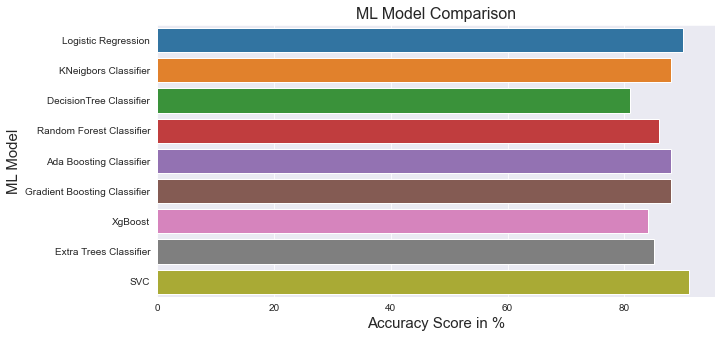

In [166]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'ML_Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that Support Vector machine(91%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so lets consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [167]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
2,DecisionTree Classifier,81.0,75.0,0.056567
3,Random Forest Classifier,86.0,80.0,0.061349
7,Extra Trees Classifier,85.0,78.0,0.068366
6,XgBoost,84.0,77.0,0.068426
0,Logistic Regression,90.0,82.0,0.081949
5,Gradient Boosting Classifier,88.0,79.0,0.087241
4,Ada Boosting Classifier,88.0,80.0,0.088966
8,SVC,91.0,69.0,0.215397
1,KNeigbors Classifier,88.0,63.0,0.246882


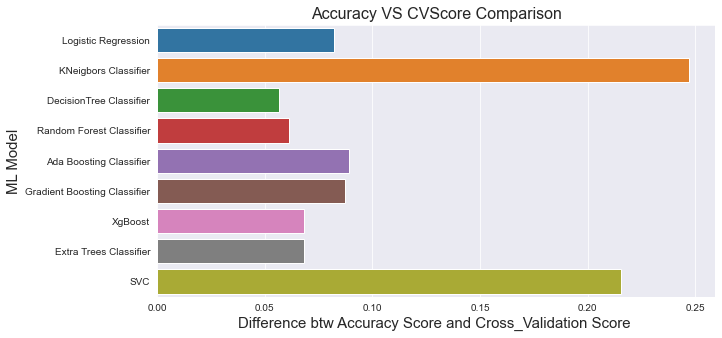

In [168]:
#A more clearer visualization.....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'ML_Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is Extra tree classifier!

# Step 6.2 - Conclusion on Best Choice of Model

From the above we can see:
 - The Model with the best the best accuracy score is SVM but its diff between the accuracy score and cvs is still highest
 
 - I will go for the Logistic Regression model because its accuracy score is High and difference is low

# Hence Optimum Machine Model Chosen = Logistic Regression MODEL!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [169]:
lr = LogisticRegression()

In [170]:
penalty = ['l1', 'l2'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
solver = ['liblinear', 'saga'] 
param_grid = dict(penalty=penalty, 
C=C, 
class_weight=class_weight, 
solver=solver)  
grid = GridSearchCV(estimator=lr, 
param_grid=param_grid, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 
grid_result = grid.fit(x_train, y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Score:  0.711946799497336
Best Params:  {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


Now lets use the best parameters.....

In [171]:
#Instantiating using the best parameters...
lr_hyp = LogisticRegression(C=1,class_weight={1: 0.6, 0: 0.4},penalty='l1',solver='liblinear')

In [172]:
#fitting the model...
lr_hyp.fit(x_train,y_train)

LogisticRegression(C=1, class_weight={0: 0.4, 1: 0.6}, penalty='l1',
                   solver='liblinear')

In [173]:
pred_test=lr_hyp.predict(x_test)

In [174]:
accuracy_score(y_test,pred_test)

0.9051724137931034

From the above we can see:
- Final Accuracy is 90% with hyper parameter tuning

HENCE WE CAN CONCLUDE OUR MODEL IS GOOD!!

# Step 8 - MODEL SAVING

In [175]:
filename='Machine_Model_Project_loanprediction'
pickle.dump(sv,open(filename,'wb'))

In [176]:
# lets check the roc score and plot the roc_auc graph
from sklearn.metrics import roc_auc_score,roc_curve
#fitting the model...
lr_hyp.fit(x_train,y_train)

y_pred_lr = lr_hyp.predict(x_test)
y_pred_sv = sv.predict(x_test)

In [177]:
# Step 6 - Creating False and True Positive Rates and printing Scores

# We have to get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve. This can be done by roc_curve module by passing the test dataset and the predicted data through it. Here we are doing this for both the classifier.



# Step 7 - Ploting ROC Curves

# We are ploting two ROC Curve as subplots one for Support Vector Classifier and another for LogisticRegression. Both have their respective False Positive Rate on X-axis and True Positive Rate on Y-axis.

    

roc score for lr is : 0.8091968372867249
roc score for lr is : 0.8091968372867249


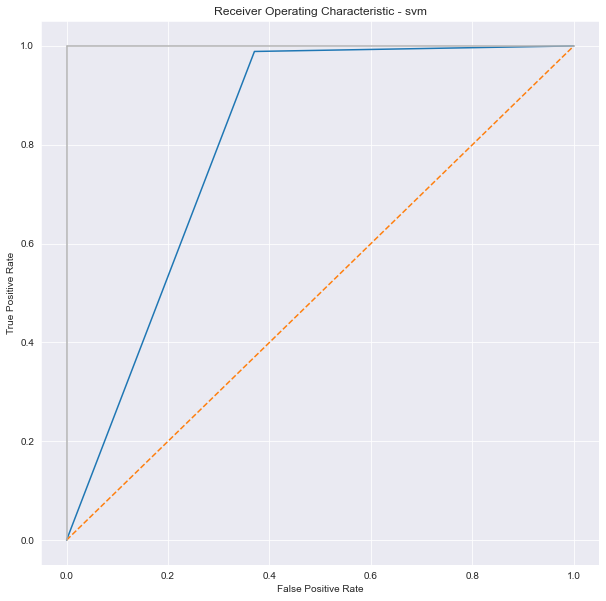

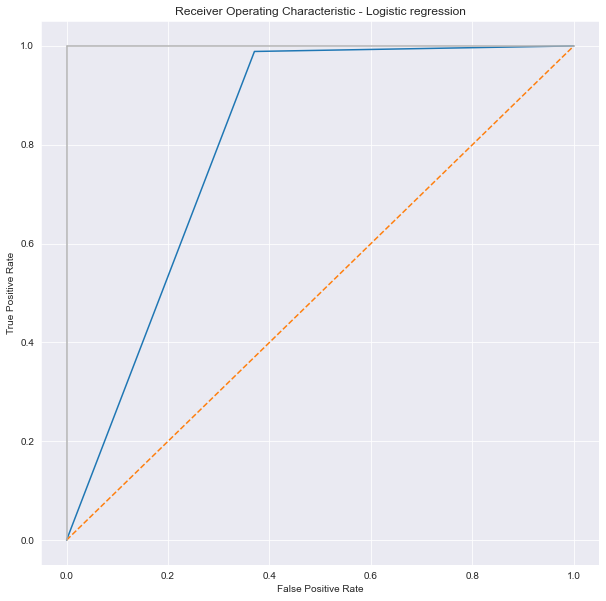

In [179]:
fpr1,tpr1, threshold1 = roc_curve(y_test, y_pred_lr)
fpr2,tpr2, threshold2 = roc_curve(y_test, y_pred_sv)

roc_lr = roc_auc_score(y_test, y_pred_lr)
roc_sv = roc_auc_score(y_test, y_pred_sv)
print('roc score for lr is :',roc_lr)
print('roc score for svm is :',roc_sv)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - svm')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr1, tpr1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()